In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import glob
import math
import random
import time
import scipy
import umap

In [3]:
L_H_N=pd.read_csv("/Users/farhadzare/Desktop/Endothelium/Data/List_of_Hum_Filenames.csv")

In [9]:
L_H_N["Names"][0]

'E-GEOD-60332 data.csv'

In [10]:
ENList=[]
for i in range(0,len(L_H_N)):
    df=pd.read_csv(f"/Users/farhadzare/Desktop/Endothelium/Data/{L_H_N['Names'][i]}")
    if type(df['Feature'][1])== str:
        ENList.append(i)  

In [11]:
ENList=[L_H_N["Names"][i] for i in ENList]

In [12]:
List_of_B_csv=[i for i in L_H_N["Names"] if "_B data.csv" in i]

In [13]:
L_O_ent=list(set(L_H_N["Names"])-set(ENList))
L_o_ent_w_B=list(set(L_O_ent)-set(List_of_B_csv))

In [15]:
df=[pd.read_csv(f"/Users/farhadzare/Desktop/Endothelium/Data/{i}") for i in L_o_ent_w_B]

In [16]:
Num_o_R_C=[(df[i].shape,(i,L_o_ent_w_B[i])) for i in range(0,len(df))]

In [17]:
def take_First(L):
    return L[0][1]

In [18]:
Num_o_R_C.sort(key=take_First, reverse=True)

In [19]:
Y=[Num_o_R_C[i] for i in range(0,207) if Num_o_R_C[i][0][0]>8000]

In [20]:
dfN=[df[Y[i][1][0]] for i in range(0,200)]

In [21]:
T=[dfN[0]]
Len_I=[T[0].shape[0]]
N=[0]
L=[T[0].shape[1]]
L_o_nonIn=[]

In [22]:
def cont(L):
    if len(L)>=5:
        return random.sample(L,5)
    elif len(L)==0:
        return 0
    else: 
        return random.sample(L,len(L))
    

In [23]:
for i in range(1,200):          
    A=list(range(0,200))
    for n in list(set(list(range(1,200)))-set(N)):
        A[n]=pd.merge(T[i-1],dfN[n], on="Feature").shape[0]  
                            
    Len_I.append(max(A))
    t=A.index(max(A))       
    T.append(pd.merge(T[i-1],dfN[t],on="Feature"))
    N.append(t)
    L.append(T[i].shape[1])
    L1=cont(list(set(dfN[t]['Feature'])-set(T[i]['Feature'])))
    L2=cont(list(set(T[i-1]['Feature'])-set(T[i]['Feature'])))
    L3=random.sample(list(T[i]['Feature']),5)
    L_o_nonIn.append((L1,L2,L3))
    if i%10==0:
        time.sleep(10)

In [24]:
pd.DataFrame([(L_o_nonIn[i][0],L_o_nonIn[i][1],L_o_nonIn[i][2]) for i in range(0,30)])

,0,1,2
0,"[26780, 100996671, 126068, 285195, 100505841]",0,"[6284, 55284, 79830, 2063, 8001]"
1,"[4885, 57113, 269, 1815, 100132285]",0,"[27332, 645, 8662, 64428, 746]"
2,"[5837, 8643, 25928, 59344, 54738]",0,"[11226, 347240, 6528, 51204, 51146]"
3,"[90246, 285848, 5816, 151126, 283416]",0,"[8519, 79654, 168544, 26033, 57579]"
4,"[3218, 54798, 5753, 8875, 2769]",0,"[25778, 55324, 3557, 10288, 79184]"
5,"[80714, 166979, 26343, 120114, 84968]",0,"[51497, 2035, 5879, 55027, 10318]"
6,"[2587, 50805, 51471, 3239, 50840]",0,"[2038, 7551, 8835, 6513, 5790]"
7,"[100628315, 7401, 284257, 257000, 137392]",0,"[166647, 51635, 4496, 54514, 4319]"
8,"[2248, 2928, 9294, 5545, 23017]",0,"[6996, 117246, 65124, 56980, 63926]"
9,"[79102, 53344, 5273, 100144604, 85456]",0,"[26010, 22876, 6720, 320, 7486]"


In [25]:
L_o_R_C=[(Len_I[i],L[i]) for i in range(1,199)]

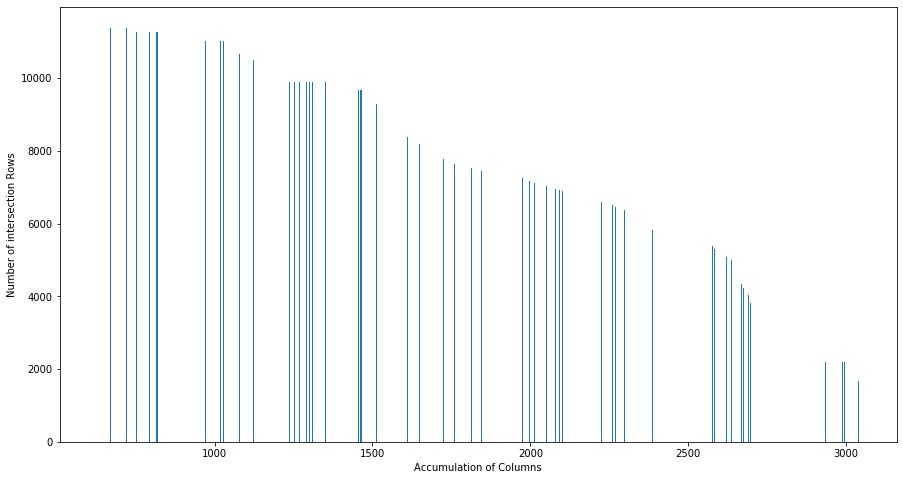

In [26]:
fig = plt.figure(figsize =(15, 8))
plt.bar(L,Len_I)
plt.xlabel("Accumulation of Columns")
plt.ylabel("Number of intersection Rows")
plt.show()

In [27]:
Z=[np.sqrt((L_o_R_C[i][0]/11400)**2+(L_o_R_C[i][1]/3050)**2) for i in range(80,180)]

In [28]:
Z.index(max(Z))

86

In [29]:
L_o_R_C[166]

(4998, 2637)

In [31]:
L_o_R_C[80]

(7857, 1697)

In [33]:
L_o_R_C[180]

(3243, 2759)

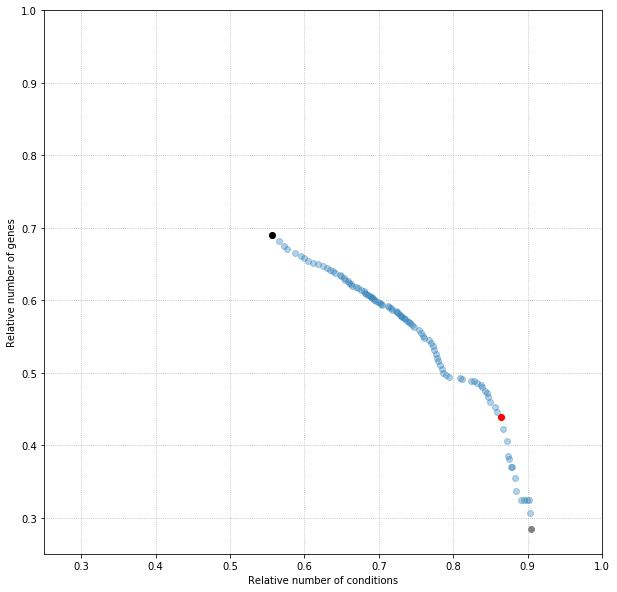

In [35]:
W=[L_o_R_C[i][0]/11400 for i in range(80,180)]
M=[L_o_R_C[i][1]/3050 for i in range(80,180)]
fig = plt.figure(figsize =(10, 10))
plt.scatter(M,W , alpha=1/3)
plt.scatter(2637/3050,4998/11400, c='red')
plt.scatter(1697/3050,7857/11400, c='black')
plt.scatter(2759/3050,3243/11400, c='gray')
plt.xlim((.25,1))
plt.ylim((.25,1))
plt.xlabel("Relative number of conditions")
plt.ylabel("Relative number of genes")
plt.grid(.5,ls=":")
plt.show()

In [36]:
T[80]

,Feature,GSM752709.cel,GSM752710.cel,GSM752711.cel,GSM752712.cel,GSM752713.cel,GSM752714.cel,GSM752715.cel,GSM752716.cel,GSM752717.cel,...,GSM524664.CEL,GSM524665.CEL,GSM524666.CEL,GSM524667.CEL,GSM524668.CEL,GSM524669.CEL,GSM524670.CEL,GSM524671.CEL,GSM524672.CEL,GSM524673.CEL
0,100,6.082276,6.296477,5.678143,5.903716,6.561618,6.563634,6.315923,6.285618,6.213070,...,7.750772,8.033154,8.308162,7.835437,7.776701,7.633756,7.494028,8.499966,8.630758,8.790636
1,1000,8.910453,9.094440,9.018398,8.981716,9.903595,9.752144,10.060706,10.016482,10.449370,...,8.733751,7.675759,7.363780,8.594902,8.062716,8.545417,8.466868,7.333242,7.202518,7.098090
2,10000,3.903745,3.573659,3.750108,4.090731,3.960562,3.867853,3.701989,3.649789,3.906663,...,5.670670,5.904249,4.631333,5.481973,6.021733,5.955469,5.636307,5.702140,5.172522,3.934180
3,10002,3.436067,3.749943,3.633040,3.603325,3.616494,3.655343,3.577688,3.691253,3.408437,...,3.277355,3.715912,3.201729,3.195338,3.562165,3.265788,3.215064,3.126694,3.245178,3.253068
4,10003,3.032216,3.215596,3.213584,3.137990,2.839648,3.048697,2.999298,3.177813,3.120557,...,1.490847,2.977722,1.800068,1.451153,1.422210,2.345440,1.529291,1.485613,1.874940,1.584188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7993,9989,9.607231,9.543961,9.677517,9.559407,9.398856,9.486502,9.366075,9.296258,9.427576,...,10.976274,11.019397,10.442276,10.809420,10.906688,10.803286,10.837614,11.122216,11.037532,11.089285
7994,9990,4.541300,4.129266,4.073877,4.563461,3.990184,3.708544,3.967550,3.958163,4.084023,...,8.462904,7.923245,8.953560,7.777175,8.059467,7.908441,7.547959,8.181400,8.076945,8.486098
7995,9991,5.560324,5.308262,5.546625,5.734750,5.004711,4.987957,5.177761,5.127617,5.182611,...,7.935979,8.539086,6.666280,8.180181,8.434987,8.250972,8.429984,8.152220,7.916809,7.423617
7996,9993,5.421064,5.107210,5.445133,5.229923,5.538198,5.591131,5.475488,5.330362,5.484444,...,8.003655,8.129998,8.228359,7.844008,7.910159,7.576729,7.538533,8.330828,8.147516,8.102656


In [37]:
T[180]

,Feature,GSM752709.cel,GSM752710.cel,GSM752711.cel,GSM752712.cel,GSM752713.cel,GSM752714.cel,GSM752715.cel,GSM752716.cel,GSM752717.cel,...,GSM1027968_DEC_91_251485031838_1_1.txt,GSM1027969_DEC_101_251485031837_1_4.txt,GSM1027970_DEC_991_251485031837_1_3.txt,GSM1027971_ADMEC_A_251485031806_1_4.txt,GSM1027972_ADMEC_B_251485031836_1_2.txt,GSM1027973_ADMEC_C_251485031836_1_3.txt,GSM2037044,GSM2037045,GSM2037046,GSM2037047
0,100,6.082276,6.296477,5.678143,5.903716,6.561618,6.563634,6.315923,6.285618,6.213070,...,10.965063,10.261458,10.492855,11.111625,10.991286,11.980824,3.428974,3.434636,3.458436,3.559627
1,1000,8.910453,9.094440,9.018398,8.981716,9.903595,9.752144,10.060706,10.016482,10.449370,...,8.390348,8.113308,7.662965,7.244760,6.651052,6.651052,3.042140,3.125261,3.191491,3.037192
2,10000,3.903745,3.573659,3.750108,4.090731,3.960562,3.867853,3.701989,3.649789,3.906663,...,7.127564,6.973458,6.946419,7.255815,6.689998,6.816984,2.886513,2.806063,2.913940,2.909909
3,10005,5.963907,6.097107,5.790247,5.761399,6.016096,6.124152,6.104648,5.986309,5.860771,...,9.391870,8.542065,8.622052,8.553949,9.061371,8.041431,3.110980,3.141196,3.043698,3.164067
4,10006,7.752008,7.465366,7.941747,7.606796,7.469340,7.268851,7.641408,7.385734,7.565066,...,6.872418,7.346144,7.272241,7.334646,6.701595,6.889757,3.330743,3.328744,3.334362,3.318298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,998,11.040979,11.418171,11.222550,11.050198,9.632507,9.783043,9.848953,9.729007,10.025029,...,9.205386,9.071015,9.142745,9.492938,8.500178,8.915008,3.424207,3.323156,3.539404,3.494889
3489,9984,7.934275,8.313562,7.915767,7.927955,8.109991,8.160408,8.077532,7.980850,8.142980,...,6.749311,6.877540,6.883662,7.019591,6.675957,6.662965,3.415297,3.439935,3.427494,3.371570
3490,9988,7.174313,6.760496,7.501811,7.240025,6.728994,6.783438,6.969090,6.736542,7.137760,...,6.758223,7.128424,7.124121,8.221990,6.933691,7.116344,3.312545,3.246273,3.237087,3.149540
3491,9989,9.607231,9.543961,9.677517,9.559407,9.398856,9.486502,9.366075,9.296258,9.427576,...,7.415742,8.395177,8.413275,7.486500,7.917372,8.041431,3.535431,3.479668,3.499327,3.525783


In [23]:
[pd.read_csv(f"/Users/farhadzare/Desktop/Endotheliom/metadata/{Y[N[i]][1][1].replace('data', 'metadata')}", encoding='latin1')['Platform'][0] for i in range(0,50)]

['Affymetrix GeneChip HT Human Genome U133A',
 'Affymetrix GeneChip Human Genome U133 Plus 2.0',
 'Affymetrix GeneChip Human Genome HG-U133A',
 'Affymetrix GeneChip Human Genome U133 Plus 2.0',
 'GeneChipPrimeView Human Gene Expression Array',
 'Affymetrix GeneChip Human Genome HG-U133A',
 'Affymetrix GeneChip HTA-2_0 - Gene Level - HTA-2_0.r1.Psrs.mps probesets',
 'Affymetrix GeneChip Human Genome U133 Plus 2.0',
 'Affymetrix GeneChip Human Genome HG-U133A',
 'Affymetrix GeneChip Human Genome HG-U133A',
 'Affymetrix GeneChip Human Genome HG-U133A',
 'Affymetrix GeneChip Human Genome U133 Plus 2.0',
 'Illumina HumanHT-12 V4.0 expression beadchip',
 'Illumina HumanHT-12 V4.0 expression beadchip',
 'Illumina HumanHT-12 V4.0 expression beadchip',
 'Illumina HumanHT-12 V4.0 expression beadchip',
 'Illumina HumanHT-12 V4.0 expression beadchip',
 'Illumina HumanHT-12 V4.0 expression beadchip',
 'Illumina HumanHT-12 V4.0 expression beadchip',
 'Illumina HumanHT-12 V4.0 expression beadchip',
 

In [20]:
Y[N[169]]

((15320, 17), (127, 'E-GEOD-12679 data.csv'))

In [21]:
ListOfOptim=[Y[N[i]][1][1] for i in range(0,168)]

In [22]:
ListOfOptim

['E-GEOD-30169 data.csv',
 'E-GEOD-5883 data.csv',
 'E-GEOD-3920 data.csv',
 'E-GEOD-5556 data.csv',
 'E-GEOD-69996 data.csv',
 'E-GEOD-2299_A data.csv',
 'E-GEOD-85468 data.csv',
 'E-GEOD-3601 data.csv',
 'E-GEOD-3998 data.csv',
 'E-GEOD-20978 data.csv',
 'E-GEOD-3364 data.csv',
 'E-GEOD-1377 data.csv',
 'E-GEOD-80067 data.csv',
 'E-GEOD-44167 data.csv',
 'E-GEOD-72180 data.csv',
 'E-GEOD-43349 data.csv',
 'E-GEOD-28656 data.csv',
 'E-MTAB-5686 data.csv',
 'E-GEOD-43742 data.csv',
 'E-GEOD-69067 data.csv',
 'E-GEOD-51253 data.csv',
 'E-GEOD-50112 data.csv',
 'E-MTAB-3277 data.csv',
 'E-MTAB-2519 data.csv',
 'E-GEOD-48006 data.csv',
 'E-GEOD-46825 data.csv',
 'E-GEOD-44926 data.csv',
 'E-GEOD-45750 data.csv',
 'E-GEOD-76739 data.csv',
 'GSE-77199 data.csv',
 'E-GEOD-46471 data.csv',
 'E-GEOD-56976 data.csv',
 'E-MTAB-4860 data.csv',
 'E-GEOD-57825 data.csv',
 'E-GEOD-37091 data.csv',
 'E-GEOD-41110 data.csv',
 'E-GEOD-30780 data.csv',
 'E-GEOD-18035 data.csv',
 'E-GEOD-20739 data.csv',

In [23]:
os.chdir('..')

In [38]:
T[80].to_csv("Max_gene_dataset.csv")

In [39]:
T[180].to_csv('Max_sample_dataset.csv')

In [41]:
ListOfMaxgene=[Y[N[i]][1][1] for i in range(0,80)]

In [43]:
ListOfMaxsample=[Y[N[i]][1][1] for i in range(0,180)]

In [30]:
T[167].to_csv("Optimal data set.csv")

In [24]:
pd.DataFrame(ListOfOptim).to_csv("List of optimal dataset.csv")

In [ ]:
pd.DataFrame([N[i]for i in range(0,168)]).to_csv("List of optimal dataset.csv")

In [42]:
pd.DataFrame(ListOfMaxgene).to_csv("List_of_max_gene.csv")

In [44]:
pd.DataFrame(ListOfMaxsample).to_csv("List_of_max_sample.csv")